<a href="https://colab.research.google.com/github/priyanshuranjan7509/Rainfll-prediction-project/blob/main/Bihar_rain_prediction_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [5]:
from google.colab import files
  
uploaded = files.upload()

Saving sub-division_rainfall_act_dep_1901-2015.csv to sub-division_rainfall_act_dep_1901-2015.csv


In [6]:
india_rainfall_data_df = pd.read_csv(io.BytesIO(uploaded['sub-division_rainfall_act_dep_1901-2015.csv']))
india_rainfall_data_df

,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,ANDAMAN & NICOBAR ISLANDS,1901-2015,Mean,49.2,27.6,30.0,72.2,355.6,471.4,397.5,400.5,431.3,289.5,233.0,153.3,2911.0,76.8,457.8,1700.7,675.8
1,ANDAMAN & NICOBAR ISLANDS,1901-2015,Standard deviation,71.3,38.8,43.6,66.8,151.2,147.0,151.9,142.6,146.7,99.4,119.4,129.5,395.9,81.1,176.8,286.3,199.0
2,ANDAMAN & NICOBAR ISLANDS,1901-2015,Coefficient of variation,144.9,140.4,145.5,92.5,42.5,31.2,38.2,35.6,34.0,34.3,51.2,84.5,13.6,105.6,38.6,16.8,29.4
3,ANDAMAN & NICOBAR ISLANDS,1901,Actual,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
4,ANDAMAN & NICOBAR ISLANDS,1901,Percentage departure,-0.1,215.9,-2.6,-96.8,48.7,9.8,-8.2,20.1,-22.9,34.2,139.5,-78.1,15.9,77.5,22.4,-0.3,45.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12451,WEST UTTAR PRADESH,2014,Percentage departure,177.6,66.4,103.9,-14.0,-11.2,-71.4,-39.1,-68.2,-43.5,-50.3,-100.0,127.5,-41.8,121.6,31.2,-53.5,-24.0
12452,WEST UTTAR PRADESH,2014,No. of districts,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,NaN,NaN,NaN,NaN,NaN
12453,WEST UTTAR PRADESH,2015,Actual,31.6,7.2,66.8,21.0,8.1,72.0,194.2,143.5,26.5,6.9,2.0,3.0,582.7,38.8,95.9,436.1,11.9
12454,WEST UTTAR PRADESH,2015,Percentage departure,81.6,-59.4,501.7,238.5,-34.9,-6.4,-22.1,-43.7,-82.3,-76.3,-52.0,-57.7,-30.3,10.6,222.7,-40.3,-70.6


In [ ]:
india_rainfall_data_df.shape
india_rainfall_data_df.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,12428.000000,12435.000000,12433.000000,12441.000000,12440.000000,12446.00000,12442.000000,12448.000000,12443.000000,12429.000000,12393.000000,12397.000000,8288.000000,8324.000000,8319.000000,8320.000000,8311.000000
mean,11.925185,13.387873,15.677721,20.548187,33.842725,82.21770,121.070849,102.237275,71.355525,37.236141,18.596474,11.629088,703.619800,20.935956,78.359082,531.036671,76.840296
std,89.608129,98.712922,109.143897,98.623289,102.278544,173.74049,224.187396,173.673887,123.064672,97.049822,98.522919,105.209683,950.480358,91.218028,171.869156,729.475400,151.352569
min,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-98.60000,-100.000000,-100.000000,-99.700000,-100.000000,-100.000000,-100.000000,-81.200000,-100.000000,-100.000000,-81.500000,-100.000000
25%,0.000000,0.000000,0.000000,0.600000,1.000000,5.60000,6.000000,6.000000,6.000000,1.100000,0.000000,0.000000,-0.800000,-24.950000,-12.000000,-1.100000,-12.500000
50%,9.000000,9.000000,9.400000,11.000000,13.000000,21.00000,22.000000,22.050000,22.000000,14.700000,10.000000,7.400000,160.100000,8.900000,25.100000,130.000000,32.500000
75%,23.000000,24.000000,24.600000,29.000000,36.900000,85.20000,176.450000,158.825000,111.850000,51.000000,27.000000,21.000000,1119.225000,45.100000,95.900000,878.950000,118.500000
max,2405.500000,3743.400000,3409.600000,5571.600000,2621.800000,1609.90000,2362.800000,1664.600000,1222.000000,2514.900000,1907.500000,2120.600000,6331.100000,1718.700000,1745.800000,4536.900000,1252.500000


In [17]:
india_rainfall_data_df=india_rainfall_data_df[india_rainfall_data_df.Parameter=="Actual"]
india_rainfall_data_df.rename(columns = {'JF':'Jan-Feb', 'MAM':'Mar-May','JJAS':'Jun-Sep','OND':'Oct-Dec'}, inplace = True)
india_rainfall_data_df= india_rainfall_data_df.fillna(india_rainfall_data_df.mean())
india_rainfall_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4116 entries, 3 to 12453
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   object 
 2   Parameter    4116 non-null   object 
 3   JAN          4116 non-null   float64
 4   FEB          4116 non-null   float64
 5   MAR          4116 non-null   float64
 6   APR          4116 non-null   float64
 7   MAY          4116 non-null   float64
 8   JUN          4116 non-null   float64
 9   JUL          4116 non-null   float64
 10  AUG          4116 non-null   float64
 11  SEP          4116 non-null   float64
 12  OCT          4116 non-null   float64
 13  NOV          4116 non-null   float64
 14  DEC          4116 non-null   float64
 15  ANNUAL       4116 non-null   float64
 16  Jan-Feb      4116 non-null   float64
 17  Mar-May      4116 non-null   float64
 18  Jun-Sep      4116 non-null   float64
 19  Oct-D

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
subdivs = india_rainfall_data_df['SUBDIVISION'].unique()
num_of_subdivs = subdivs.size
print('Total # of Subdivs: ' + str(num_of_subdivs))
print(subdivs)

Total # of Subdivs: 36
['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'BIHAR' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'COASTAL KARNATAKA'
 'EAST MADHYA PRADESH' 'EAST RAJASTHAN' 'EAST UTTAR PRADESH'
 'GANGETIC WEST BENGAL' 'GUJARAT REGION' 'HARYANA DELHI & CHANDIGARH'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND' 'KERALA' 'KONKAN & GOA'
 'LAKSHADWEEP' 'MADHYA MAHARASHTRA' 'MATATHWADA' 'NAGA MANI MIZO TRIPURA'
 'NORTH INTERIOR KARNATAKA' 'ORISSA' 'PUNJAB' 'RAYALSEEMA'
 'SAURASHTRA & KUTCH' 'SOUTH INTERIOR KARNATAKA'
 'SUB HIMALAYAN WEST BENGAL & SIKKIM' 'TAMIL NADU' 'TELANGANA'
 'UTTARAKHAND' 'VIDARBHA' 'WEST MADHYA PRADESH' 'WEST RAJASTHAN'
 'WEST UTTAR PRADESH']


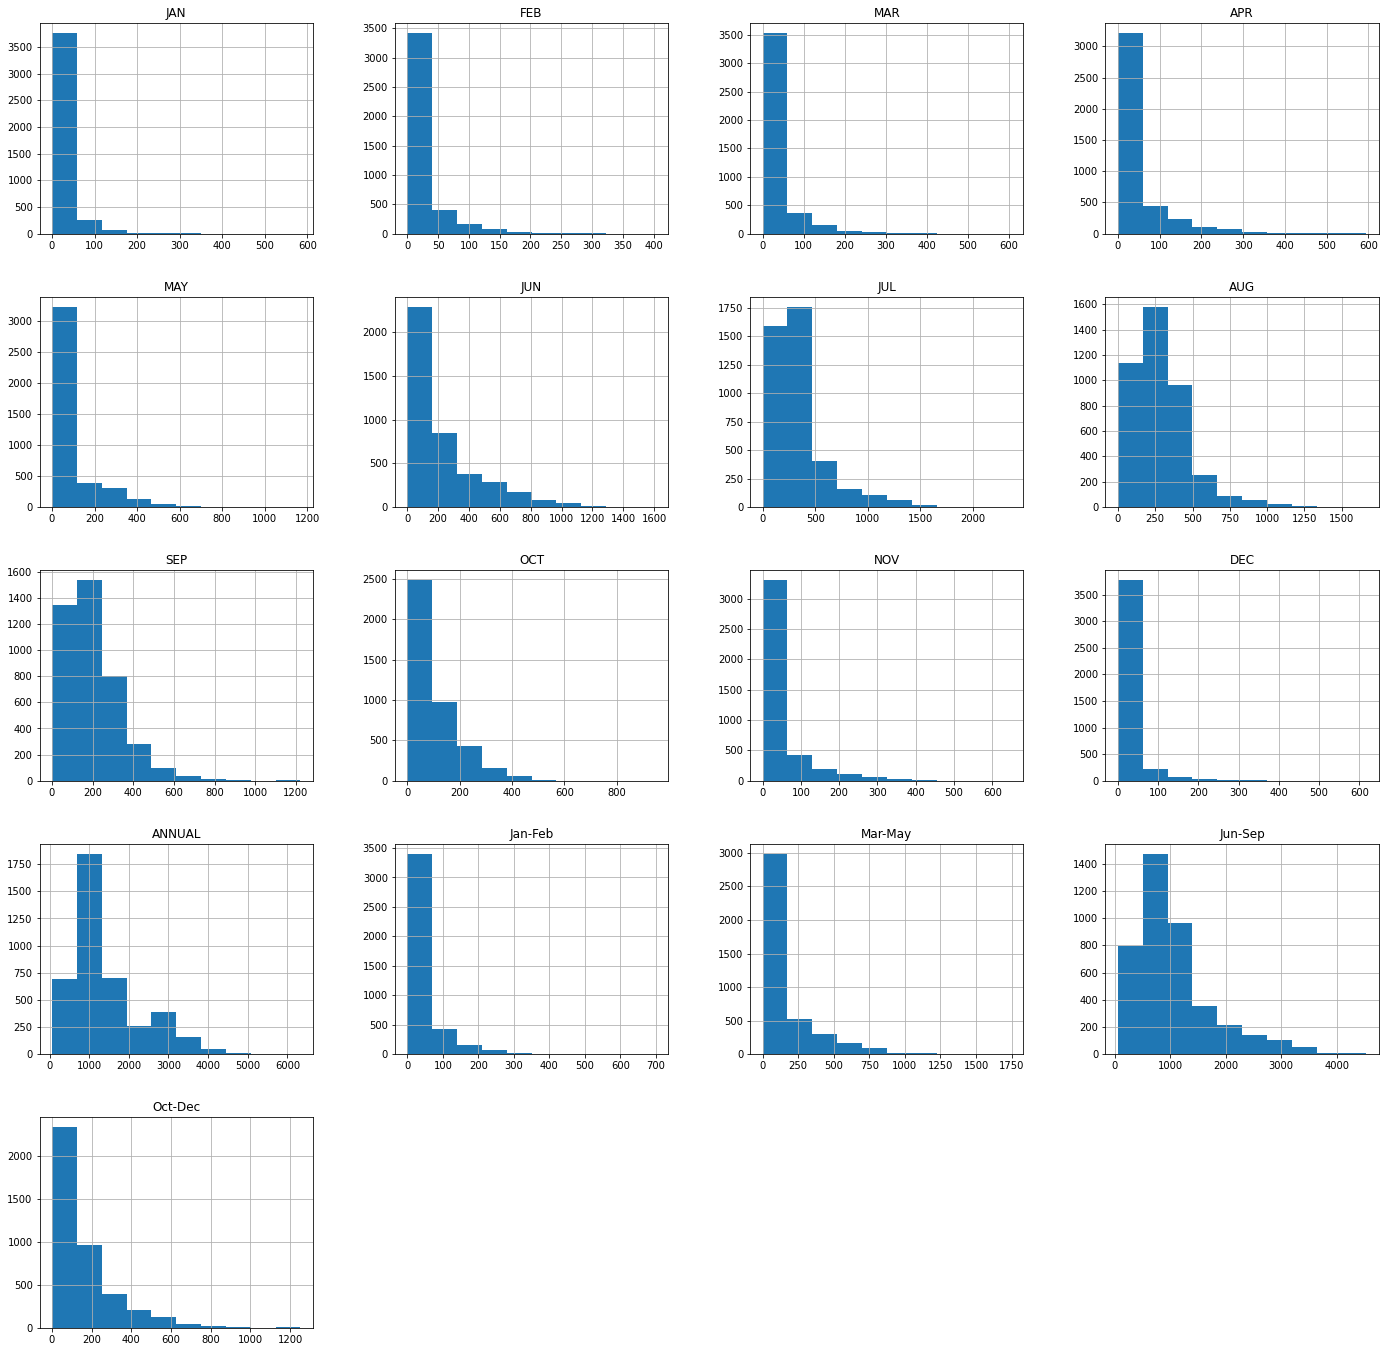

In [15]:
india_rainfall_data_df.hist(figsize=(24,24));

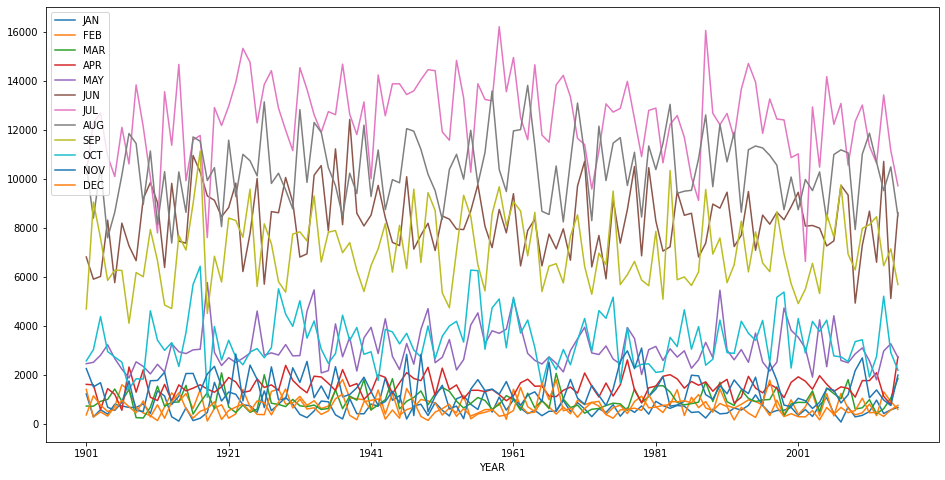

In [ ]:
india_rainfall_data_df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(16,8));

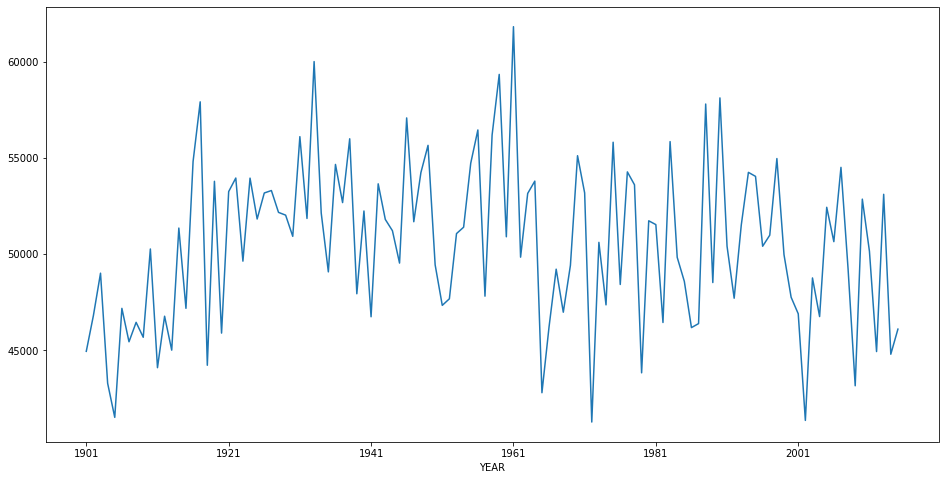

In [ ]:
india_rainfall_data_df.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(16,8));

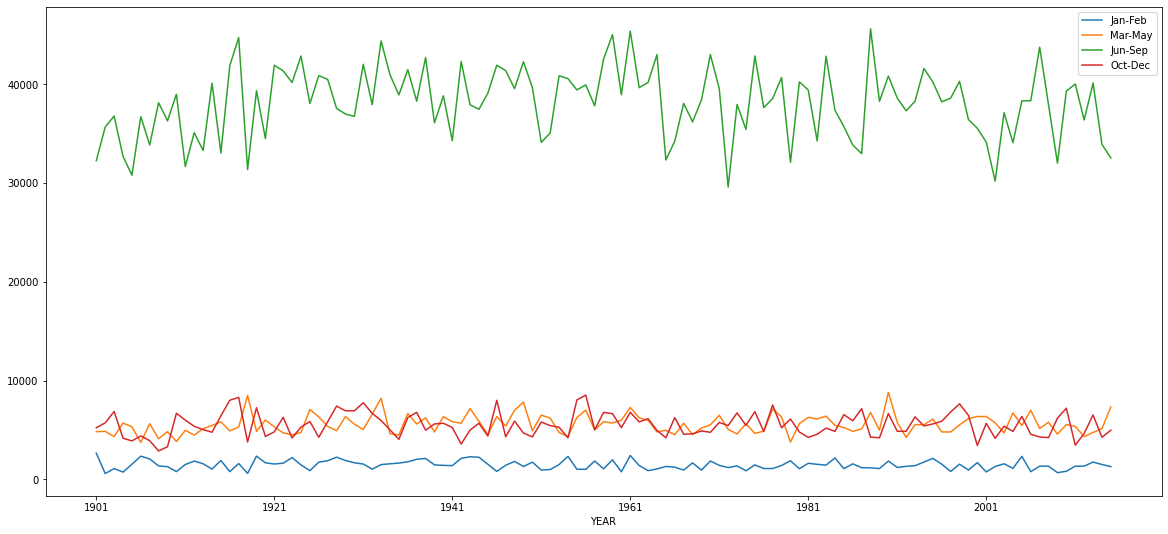

In [19]:
india_rainfall_data_df[['YEAR','Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(20,9));

SUBDIVISION
COASTAL KARNATAKA    3391.040947
ARUNACHAL PRADESH    3294.660344
KONKAN & GOA         2977.686087
Name: ANNUAL, dtype: float64
SUBDIVISION
HARYANA DELHI & CHANDIGARH    530.496522
SAURASHTRA & KUTCH            495.161739
WEST RAJASTHAN                292.673043
Name: ANNUAL, dtype: float64


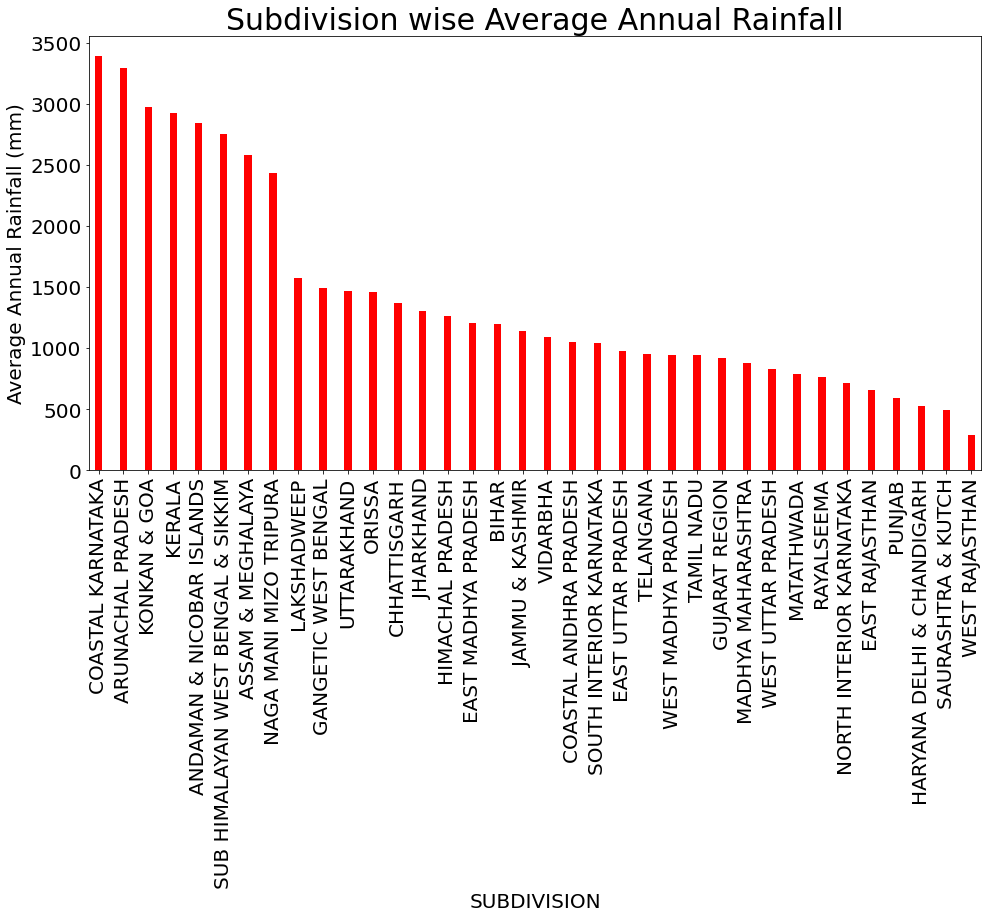

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
india_rainfall_data_df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot(kind='bar', color='r',width=0.3,title='Subdivision wise Average Annual Rainfall', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(india_rainfall_data_df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[0,1,2]])
print(india_rainfall_data_df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[33,34,35]])

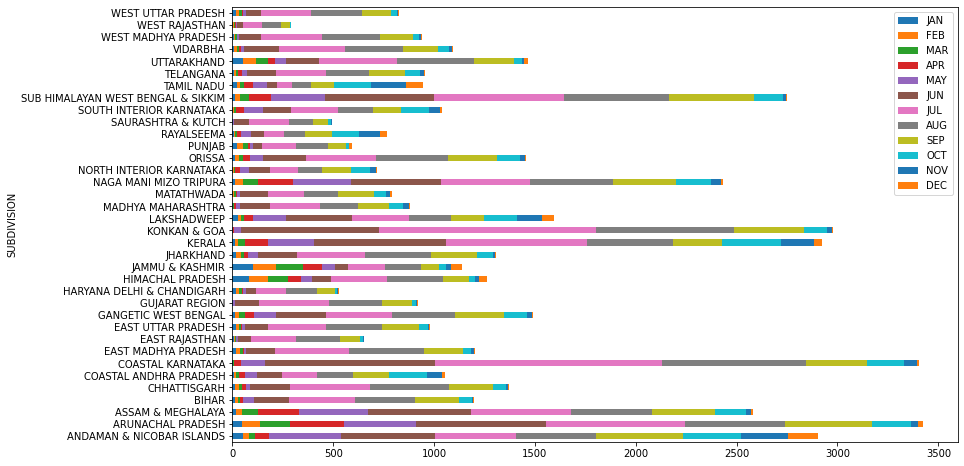

In [20]:
india_rainfall_data_df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));

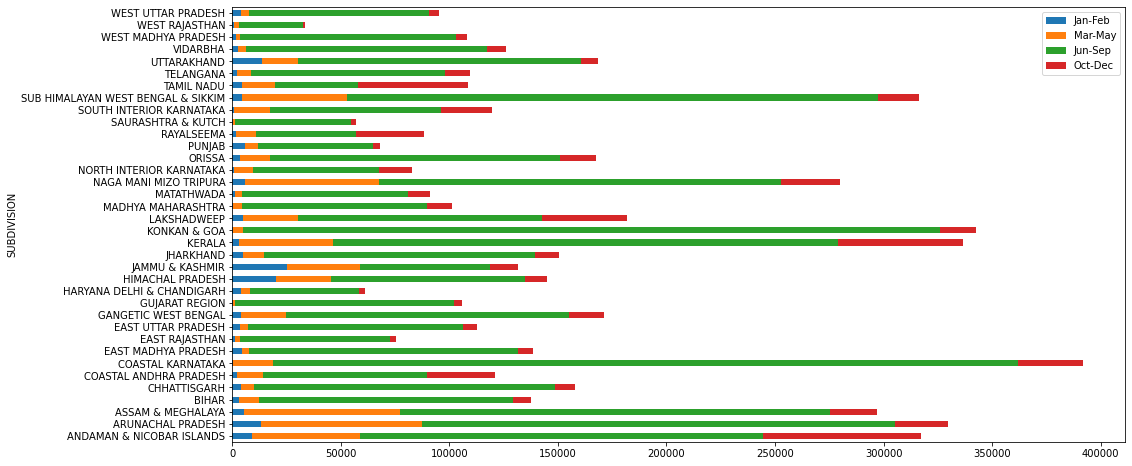

In [21]:
india_rainfall_data_df[['SUBDIVISION', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));

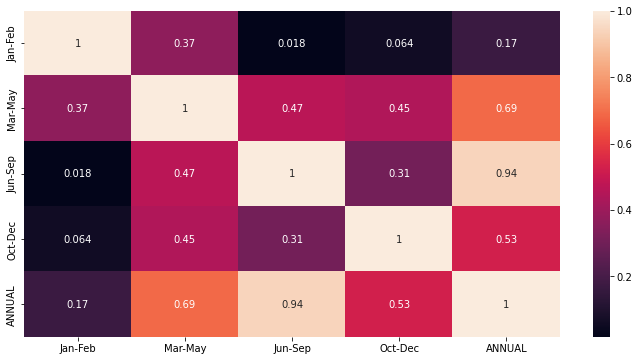

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(india_rainfall_data_df[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

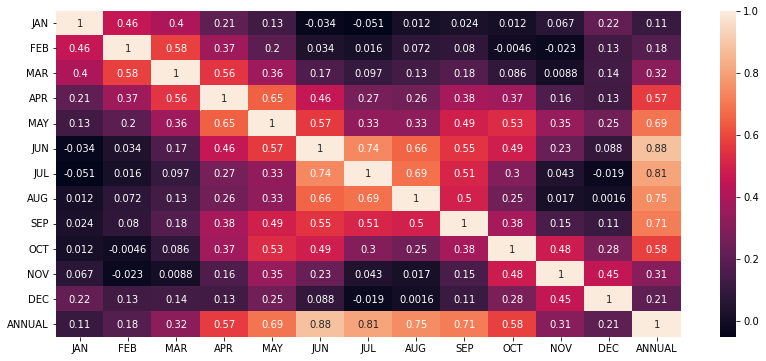

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(india_rainfall_data_df[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [7]:
#function to plot the graphs
def bar_plot(actual,predicted,title):
        plt.figure(figsize=(12, 8))
        X = ['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
        X_axis = np.arange(len(X))
        plt.bar(X_axis - 0.2, actual, 0.4, label = 'Actual_RainFall')
        plt.bar(X_axis + 0.2,predicted , 0.4, label = 'Predicted_RainFall')
        plt.xticks(X_axis, X)
        plt.xlabel("Months From April-December")
        plt.ylabel("Amount of RainFall")
        plt.title(title)
        plt.legend()
        plt.show()

In [19]:
# seperation of training and testing data of BIHAR from 1901-2013
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
bihar_data_df=india_rainfall_data_df[(india_rainfall_data_df['SUBDIVISION']=='BIHAR')]
bihar_data=bihar_data_df[(bihar_data_df['YEAR']!='2015') & (bihar_data_df['YEAR']!='2014')]
division_data = np.asarray(bihar_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
X = None; Y= None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        Y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        Y = np.concatenate((Y, division_data[:, i+3]), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [52]:
#Testing data of Bihar Rainfall of year 2014
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
temp=bihar_data_df[bihar_data_df.YEAR=='2014']
temp
data_2014 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
X_year_2014 = None; y_year_2014 = None
for i in range(data_2014.shape[1]-3):
    if X_year_2014 is None:
        X_year_2014 = data_2014[:, i:i+3]
        y_year_2014 = data_2014[:, i+3]
    else:
        X_year_2014 = np.concatenate((X_year_2014, data_2014[:, i:i+3]), axis=0)
        y_year_2014 = np.concatenate((y_year_2014, data_2014[:, i+3]), axis=0)


In [21]:
#Testing data of Bihar Rainfall of year 2015
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
temp=bihar_data_df[bihar_data_df.YEAR=='2015']
temp
data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)

In [22]:
#linear regression
#Training And Testing on  Only Bihar Rainfall Data
from sklearn import linear_model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

73.87791312580539

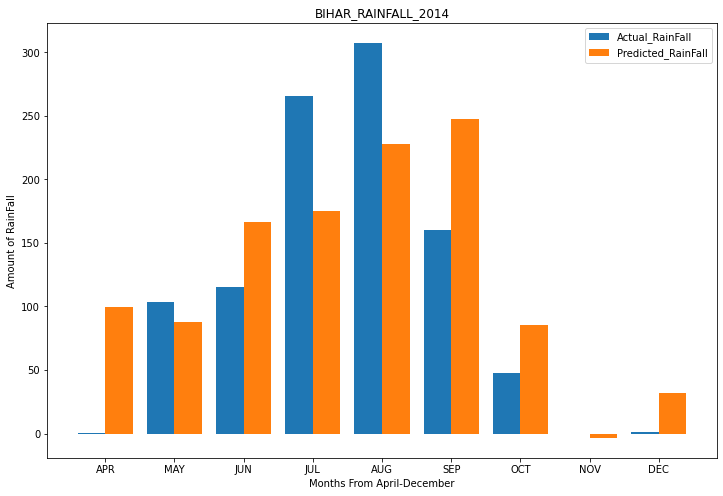

Mean of  Real rainfall in 2014: 111.34444444444446
Mean of predicted rainfall in 2014: 124.21180585350314
Std Dev of  Real rainfall in 2014: 108.28243020618822
Std Dev of  predicted rainfall in 2014: 80.7372679508919


In [28]:
#linear regression
y_year_pred_2014 = reg.predict(X_year_2014)
bar_plot(y_year_2014,y_year_pred_2014,"BIHAR_RAINFALL_2014")
print("Mean of  Real rainfall in 2014:",np.mean(y_year_2014))
print("Mean of predicted rainfall in 2014:",np.mean(y_year_pred_2014))
print("Std Dev of  Real rainfall in 2014:",np.sqrt(np.var(y_year_2014)))
print("Std Dev of  predicted rainfall in 2014:",np.sqrt(np.var(y_year_pred_2014)))

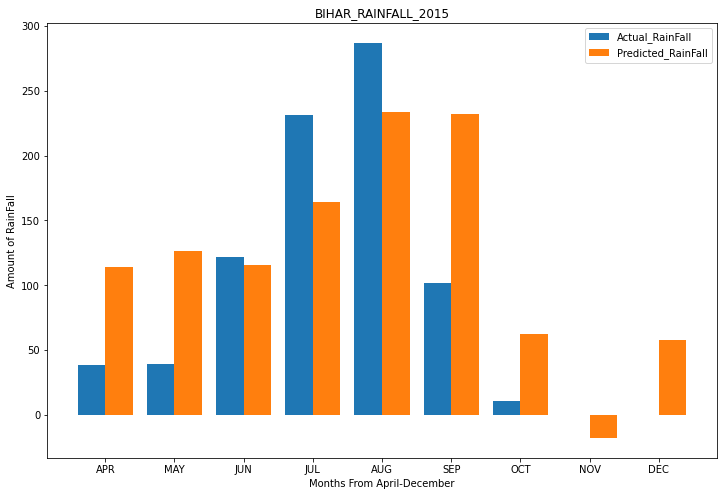

Mean of  Real rainfall in 2015: 92.32222222222222
Mean of predicted rainfall in 2015: 120.89043565707617
Std Dev of  Real rainfall in 2015: 98.69600664867379
Std Dev of  predicted rainfall in 2015: 77.2203242432373


In [ ]:
#linear regression
y_year_pred_2015=reg.predict(X_year_2015)
bar_plot(y_year_2015,y_year_pred_2015,"BIHAR_RAINFALL_2015")
print("Mean of  Real rainfall in 2015:",np.mean(y_year_2015))
print("Mean of predicted rainfall in 2015:",np.mean(y_year_pred_2015))
print("Std Dev of  Real rainfall in 2015:",np.sqrt(np.var(y_year_2015)))
print("Std Dev of  predicted rainfall in 2015:",np.sqrt(np.var(y_year_pred_2015)))

In [29]:
# seperation of training and testing data of Whole India from 1901-2013
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
data=india_rainfall_data_df[(india_rainfall_data_df['YEAR']!='2015') & (india_rainfall_data_df['YEAR']!='2014')]
division_data1 = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
X1 = None; Y1= None
for i in range(division_data1.shape[1]-3):
    if X1 is None:
        X1 = division_data1[:, i:i+3]
        Y1 = division_data1[:, i+3]
    else:
        X1 = np.concatenate((X1, division_data1[:, i:i+3]), axis=0)
        Y1 = np.concatenate((Y1, division_data1[:, i+3]), axis=0)
        
X_train1, X_test1, y_train1, y_test1= train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [ ]:
#Linear Regression
#Training And Testing on Whole India Rainfall Data
from sklearn import linear_model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train1, y_train1)
y_pred1= reg.predict(X_test1)
mean_absolute_error(y_test1, y_pred1)

94.79075197954174

In [23]:
#SVM MODEL
#Training And Testing on Bihar Rainfall Data
from sklearn.svm import SVR
clf = SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
mean_absolute_error(y_test, y_pred)

118.26305821996674

Mean of  Real rainfall in 2014: 111.34444444444446
Mean of predicted rainfall in 2014: 72.18633077542269
Std Dev of  Real rainfall in 2014: 108.28243020618822
Std Dev of  predicted rainfall in 2014: 0.003992504428697534


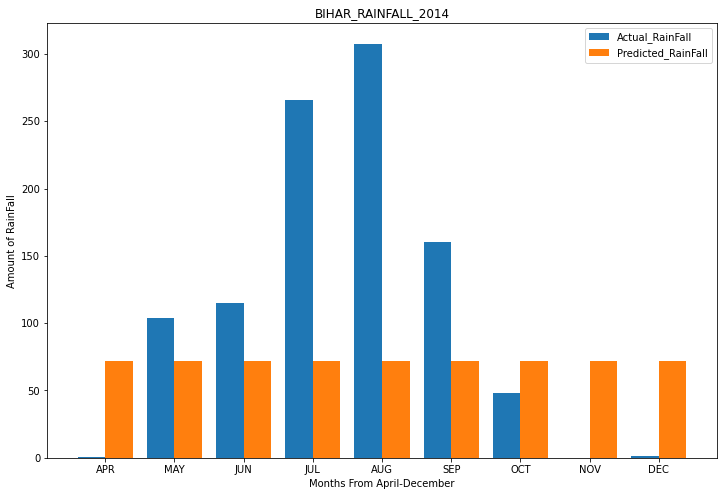

92.28054267631501

In [ ]:
#Testing on 2014 data
print("Mean of  Real rainfall in 2014:",np.mean(y_year_2014))
print("Mean of predicted rainfall in 2014:",np.mean(y_year_pred_2014))
print("Std Dev of  Real rainfall in 2014:",np.sqrt(np.var(y_year_2014)))
print("Std Dev of  predicted rainfall in 2014:",np.sqrt(np.var(y_year_pred_2014)))
y_year_pred_2014 = clf.predict(X_year_2014)
bar_plot(y_year_2014,y_year_pred_2014,"BIHAR_RAINFALL_2014")
mean_absolute_error(y_year_2014,y_year_pred_2014)

Mean of  Real rainfall in 2015: 92.32222222222222
Mean of predicted rainfall in 2015: 85.34635205151534
Std Dev of  Real rainfall in 2015: 98.69600664867379
Std Dev of  predicted rainfall in 2015: 0.20395517626339382


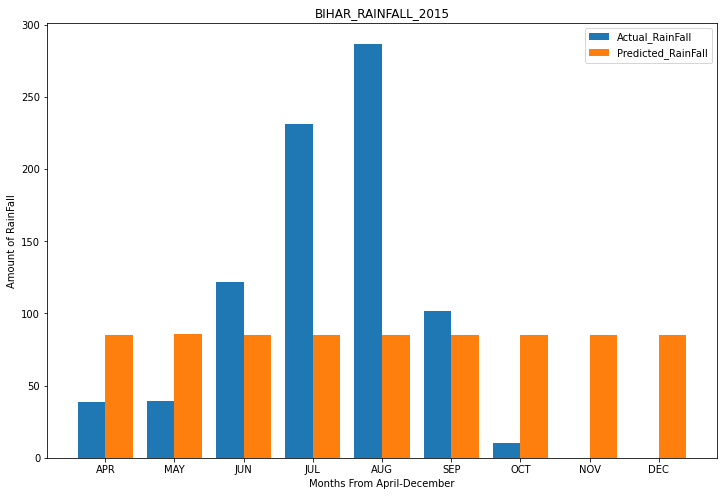

82.0822725011887

In [ ]:
#Testing on 2015 data
print("Mean of  Real rainfall in 2015:",np.mean(y_year_2015))
print("Mean of predicted rainfall in 2015:",np.mean(y_year_pred_2015))
print("Std Dev of  Real rainfall in 2015:",np.sqrt(np.var(y_year_2015)))
print("Std Dev of  predicted rainfall in 2015:",np.sqrt(np.var(y_year_pred_2015)))
y_year_pred_2015 = clf.predict(X_year_2015)
bar_plot(y_year_2015,y_year_pred_2015,"BIHAR_RAINFALL_2015")
mean_absolute_error(y_year_2015,y_year_pred_2015)

In [ ]:
#SVM MODEL
#Training And Testing on Whole India Rainfall Data
from sklearn.svm import SVR
clf = SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train1, y_train1) 
y_pred1 = clf.predict(X_test1)
mean_absolute_error(y_test1, y_pred1)

125.5378770101447

Mean of  Real rainfall in 2014: 111.34444444444446
Mean of predicted rainfall in 2014: 72.18633077542269
Std Dev of  Real rainfall in 2014: 108.28243020618822
Std Dev of  predicted rainfall in 2014: 0.003992504428697534


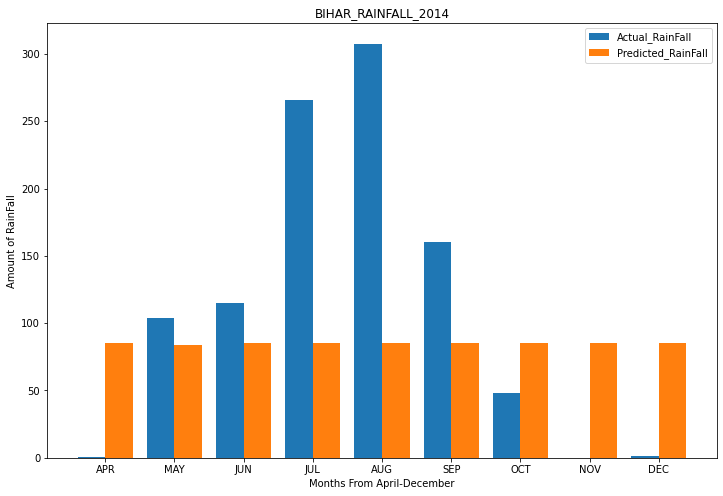

In [ ]:
#Testing on 2014 data
print("Mean of  Real rainfall in 2014:",np.mean(y_year_2014))
print("Mean of predicted rainfall in 2014:",np.mean(y_year_pred_2014))
print("Std Dev of  Real rainfall in 2014:",np.sqrt(np.var(y_year_2014)))
print("Std Dev of  predicted rainfall in 2014:",np.sqrt(np.var(y_year_pred_2014)))
y_year_pred_2014 = clf.predict(X_year_2014)
bar_plot(y_year_2014,y_year_pred_2014,"BIHAR_RAINFALL_2014")

Mean of  Real rainfall in 2015: 92.32222222222222
Mean of predicted rainfall in 2015: 85.34635205151534
Std Dev of  Real rainfall in 2015: 98.69600664867379
Std Dev of  predicted rainfall in 2015: 0.20395517626339382


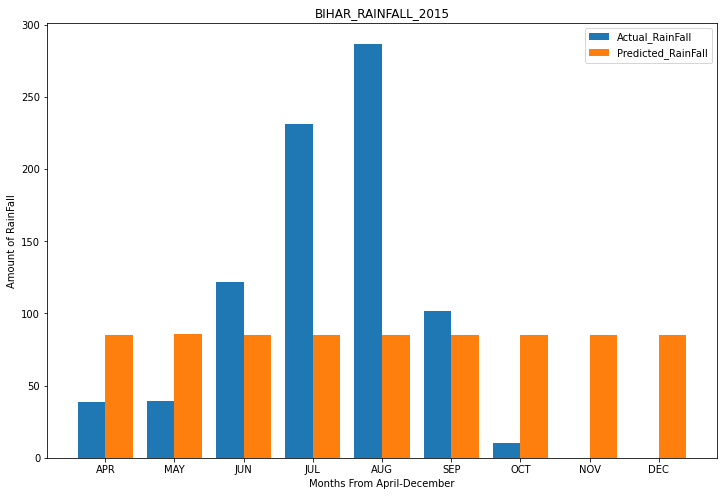

In [ ]:
#Testing on 2015 data
print("Mean of  Real rainfall in 2015:",np.mean(y_year_2015))
print("Mean of predicted rainfall in 2015:",np.mean(y_year_pred_2015))
print("Std Dev of  Real rainfall in 2015:",np.sqrt(np.var(y_year_2015)))
print("Std Dev of  predicted rainfall in 2015:",np.sqrt(np.var(y_year_pred_2015)))
y_year_pred_2015 = clf.predict(X_year_2015)
bar_plot(y_year_2015,y_year_pred_2015,"BIHAR_RAINFALL_2015")

In [46]:
#Artificial Neural Network
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 conv1d (Conv1D)             (None, 3, 64)             192       
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 128)            16512     
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 128)               49280     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080  

In [58]:
#Training and Testing on Bihar 
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
mean_absolute_error(y_test, y_pred)

Epoch 1/10
12/12 [==============================] - 0s 10ms/step - loss: 7106.6992 - mae: 57.9442 - val_loss: 8487.1006 - val_mae: 63.2009
Epoch 2/10
12/12 [==============================] - 0s 7ms/step - loss: 6790.7070 - mae: 57.5912 - val_loss: 7395.0581 - val_mae: 61.1266
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 6612.0957 - mae: 56.8267 - val_loss: 7520.6865 - val_mae: 60.7853
Epoch 4/10
12/12 [==============================] - 0s 8ms/step - loss: 6453.1655 - mae: 56.1435 - val_loss: 7102.6289 - val_mae: 60.0214
Epoch 5/10
12/12 [==============================] - 0s 7ms/step - loss: 6314.0220 - mae: 55.5944 - val_loss: 7073.4297 - val_mae: 59.5218
Epoch 6/10
12/12 [==============================] - 0s 7ms/step - loss: 6274.7817 - mae: 55.6970 - val_loss: 7990.3345 - val_mae: 61.8709
Epoch 7/10
12/12 [==============================] - 0s 7ms/step - loss: 6219.6694 - mae: 55.2488 - val_loss: 6449.7759 - val_mae: 57.8965
Epoch 8/10
12/12 [===============

56.336656652420174

In [59]:
#Testing on 2014 data
y_year_pred_2014 = model.predict(np.expand_dims(X_year_2014, axis=2))
y_year_pred_2014=y_year_pred_2014.flatten()
y_year_pred_2014

array([ 50.87479  ,   8.541208 , 231.9212   , 255.69656  , 245.43353  ,
       243.55208  ,  75.21101  ,  12.427733 ,   3.4703772], dtype=float32)

Mean of  Real rainfall in 2014: 111.34444444444446
Mean of predicted rainfall in 2014: 114.81967
Std Dev of  Real rainfall in 2014: 108.28243020618822
Std Dev of  predicted rainfall in 2014: 96.37414


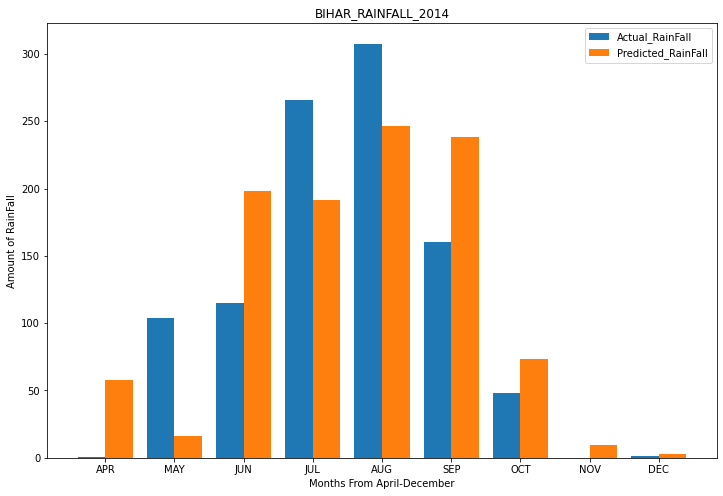

In [49]:
#Testing on 2014 data of Bihar
print("Mean of  Real rainfall in 2014:",np.mean(y_year_2014))
print("Mean of predicted rainfall in 2014:",np.mean(y_year_pred_2014))
print("Std Dev of  Real rainfall in 2014:",np.sqrt(np.var(y_year_2014)))
print("Std Dev of  predicted rainfall in 2014:",np.sqrt(np.var(y_year_pred_2014)))
bar_plot(y_year_2014,y_year_pred_2014,"BIHAR_RAINFALL_2014")

In [50]:
#Testing on 2015 data
y_year_pred_2015 = model.predict(np.expand_dims(X_year_2015, axis=2))
y_year_pred_2015=y_year_pred_2015.flatten()
y_year_pred_2015

array([104.194824 , 128.96515  , 115.47009  , 195.63261  , 263.5484   ,
       220.68143  ,  53.45373  ,   3.8414712,   3.061891 ], dtype=float32)

Mean of  Real rainfall in 2015: 92.32222222222222
Mean of predicted rainfall in 2015: 120.98329
Std Dev of  Real rainfall in 2015: 98.69600664867379
Std Dev of  predicted rainfall in 2015: 87.17856


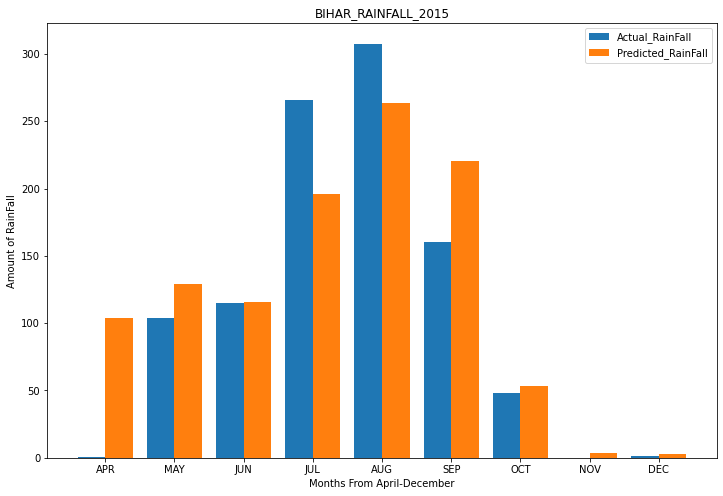

In [51]:
#Testing on 2015 data of Bihar
print("Mean of  Real rainfall in 2015:",np.mean(y_year_2015))
print("Mean of predicted rainfall in 2015:",np.mean(y_year_pred_2015))
print("Std Dev of  Real rainfall in 2015:",np.sqrt(np.var(y_year_2015)))
print("Std Dev of  predicted rainfall in 2015:",np.sqrt(np.var(y_year_pred_2015)))
bar_plot(y_year_2014,y_year_pred_2015,"BIHAR_RAINFALL_2015")

In [53]:
#Training data on Bihar data
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [44]:
Y_pred = regressor.predict(X_test)  # test the output by changing values
mean_absolute_error(y_test, y_pred)

57.64495128694271

Mean of  Real rainfall in 2014: 111.34444444444446
Mean of predicted rainfall in 2014: 134.3722222222222
Std Dev of  Real rainfall in 2014: 108.28243020618822
Std Dev of  predicted rainfall in 2014: 137.8771528078349


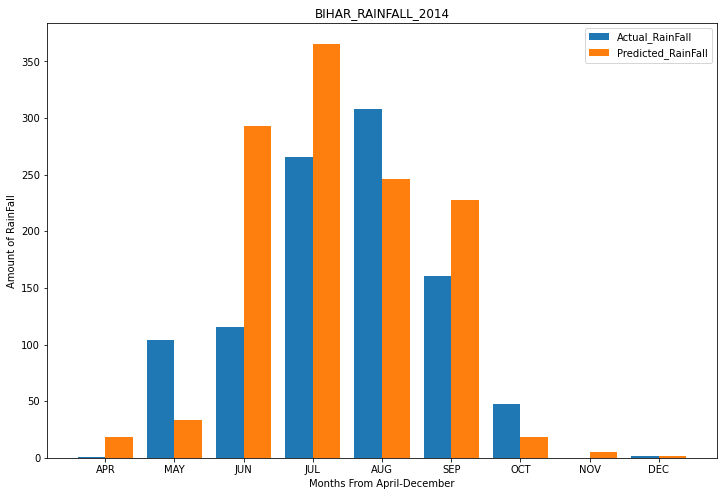

In [55]:
#Testing on 2014 data of Bihar
y_pred_2014=regressor.predict(X_year_2014)
print("Mean of  Real rainfall in 2014:",np.mean(y_year_2014))
print("Mean of predicted rainfall in 2014:",np.mean(y_pred_2014))
print("Std Dev of  Real rainfall in 2014:",np.sqrt(np.var(y_year_2014)))
print("Std Dev of  predicted rainfall in 2014:",np.sqrt(np.var(y_pred_2014)))
bar_plot(y_year_2014,y_pred_2014,"BIHAR_RAINFALL_2014")

Mean of  Real rainfall in 2015: 92.32222222222222
Mean of predicted rainfall in 2015: 155.51155555555553
Std Dev of  Real rainfall in 2015: 98.69600664867379
Std Dev of  predicted rainfall in 2015: 124.57755514191068


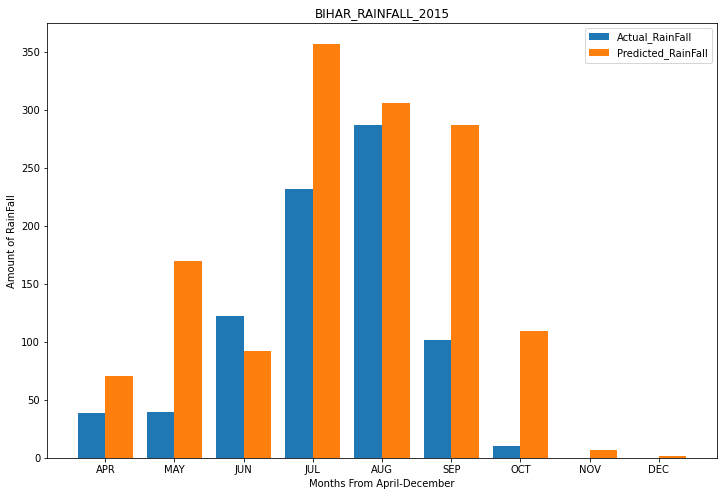

In [56]:
#Testing on 2015 data
y_year_pred_2015=regressor.predict(X_year_2015)
print("Mean of  Real rainfall in 2015:",np.mean(y_year_2015))
print("Mean of predicted rainfall in 2015:",np.mean(y_year_pred_2015))
print("Std Dev of  Real rainfall in 2015:",np.sqrt(np.var(y_year_2015)))
print("Std Dev of  predicted rainfall in 2015:",np.sqrt(np.var(y_year_pred_2015)))
bar_plot(y_year_2015,y_year_pred_2015,"BIHAR_RAINFALL_2015")

In [57]:
#Training data on Whole India data
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# fit the regressor with x and y data
regressor.fit(X_train1, y_train1) 

NameError: ignored

In [ ]:
Y_pred1 = regressor.predict(X_test1)  # test the output by changing values
mean_absolute_error(y_test1, y_pred1)

125.5378770101447

In [30]:
#Deep neural multilayer perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [31]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [32]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=7, max_iter=2000).fit(X_trainscaled, y_train)
y_pred=reg.predict(X_testscaled)
(r2_score(y_pred,y_test))

0.5801218073912204

In [33]:
mean_absolute_error(y_test, y_pred)

57.64495128694271

In [36]:
#Testing on BIHAR RAINFALL YEAR 2014
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_year_2014)
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)
y_pred_year_2014=reg.predict(X_testscaled)
mean_absolute_error(y_year_2014,y_pred_year_2014)


58.84669385747949